In [ ]:
#install kaggle
# !pip install kaggle

In [31]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #import json file
# from google.colab import files
# files.upload()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#create a kaggle folder
#!mkdir ~/.kaggle


In [ ]:
#copy the kaggle.json to folder created
#!cp kaggle.json ~/.kaggle


In [ ]:
#Set the permissions of the kaggle.json file
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle --version

In [ ]:
# !kaggle datasets list

In [ ]:
# !kaggle datasets download 'paultimothymooney/chest-xray-pneumonia'

In [ ]:
#  !unzip chest-xray-pneumonia.zip


In [ ]:
# !cp /content/chest-xray-pneumonia.zip/content/drive/MyDrive/Final_DEPI_project/dataset

In [ ]:
#move zip file of chest-xray-pneumonia.zip to my folder

# !mkdir -p /content/drive/MyDrive/Final_DEPI_project/dataset
# !mv chest-xray-pneumonia.zip /content/drive/MyDrive/Final_DEPI_project/dataset


^C


In [ ]:
# extract folder in zip file

# !unzip /content/drive/MyDrive/Final_DEPI_project/dataset/chest-xray-pneumonia.zip -d /content/drive/MyDrive/Final_DEPI_project/dataset


In [ ]:
import cv2

In [ ]:
# constants
IMG_DIMEN = 224
N_COLORS = 3

In [ ]:
# reading dataset
from tqdm import tqdm
import numpy as np
import os

def read_data(dir_path):
    X = []
    y = []
    y_map = {'NORMAL': 0, 'PNEUMONIA': 1}
    for class_name in y_map.keys():
        subdir_path = os.path.join(dir_path, class_name)
        filenames = os.listdir(subdir_path)
        for fname in tqdm(filenames):
            if fname.endswith('.jpeg'):
                img_path = os.path.join(subdir_path, fname)
                img = cv2.imread(img_path)
                img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.reshape((1, IMG_DIMEN, IMG_DIMEN, N_COLORS))
                X.append(img)
                y.append(y_map[class_name])
    X = np.vstack(X).astype('float32')/255.0
    y = np.array(y).astype('int32')
    return X, y

In [ ]:
X, y = read_data('/content/drive/MyDrive/Final_DEPI_project/chest_xray/train/train')

100%|██████████| 2712/2712 [02:02<00:00, 22.13it/s] 


In [ ]:
print(X.shape)
print(y.shape)

(3650, 224, 224, 3)
(3650,)


In [ ]:
# count number of PNEUMONIA and NORMAL image
pneumonia_count = 0
normal_count = 0

for label in y:
  if label == 1:
    pneumonia_count += 1
  else:
    normal_count += 1

print("Number of PNEUMONIA images:", pneumonia_count)
print("Number of NORMAL images:", normal_count)


Number of PNEUMONIA images: 2712
Number of NORMAL images: 938


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,  # Randomly rotate images within 20 degrees
#     width_shift_range=0.1,  # Randomly shift images horizontally by 10%
#     height_shift_range=0.1,  # Randomly shift images vertically by 10%
#     shear_range=0.2,  # Apply shear transformation
#     zoom_range=0.2,  # Apply zoom transformation
#     horizontal_flip=True,  # Randomly flip images horizontally
#     fill_mode='nearest'  # Fill in missing pixels after transformations
# )

# # Separate the data for PNEUMONIA and NORMAL
# X_pneumonia = X[y == 1]
# X_normal = X[y == 0]

# # Augment the NORMAL images to match the number of PNEUMONIA images
# augmented_images = []
# for image in X_normal:
#   for _ in range(int(pneumonia_count / normal_count)):  # Adjust the factor as needed
#       augmented_image = datagen.random_transform(image)
#       augmented_images.append(augmented_image)

# # Convert augmented_images to numpy array
# X_augmented_normal = np.array(augmented_images)

# # Combine augmented normal images with original data
# X_augmented = np.concatenate((X_pneumonia, X_normal, X_augmented_normal), axis=0)
# y_augmented = np.concatenate((np.ones(X_pneumonia.shape[0]), np.zeros(X_normal.shape[0]), np.zeros(X_augmented_normal.shape[0])), axis=0)



In [ ]:
# # Print the shape of the augmented data
# print("Shape of augmented X:", X_augmented.shape)
# print("Shape of augmented y:", y_augmented.shape)


In [ ]:
# # Count number of PNEUMONIA and NORMAL images in the augmented dataset
# pneumonia_count_augmented = 0
# normal_count_augmented = 0

# for label in y_augmented:
#     if label == 1:
#         pneumonia_count_augmented += 1
#     else:
#         normal_count_augmented += 1

# print("Number of PNEUMONIA images (augmented):", pneumonia_count_augmented)
# print("Number of NORMAL images (augmented):", normal_count_augmented)

In [ ]:
X_test, y_test = read_data('/content/drive/MyDrive/Final_DEPI_project/chest_xray/test')

100%|██████████| 390/390 [00:11<00:00, 34.35it/s]


In [ ]:
print(X_test.shape)
print(y_test.shape)

(624, 224, 224, 3)
(624,)


In [ ]:
#splitting x,y to train and validation
from sklearn.model_selection import train_test_split

#X_augmented_train, X_augmented_val, y_augmented_train, y_augmented_val = train_test_split(X_augmented, y_augmented, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.22, random_state=0)

In [ ]:
# print(X_augmented_train.shape)
# print(y_augmented_train.shape)
# print('--------------')
# print(X_augmented_val.shape)
# print(y_augmented_val.shape)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print('--------------')
print(X_val.shape)
print(y_val.shape)

(2847, 224, 224, 3)
(2847,)
--------------
(803, 224, 224, 3)
(803,)


In [ ]:
#visualizing an image
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

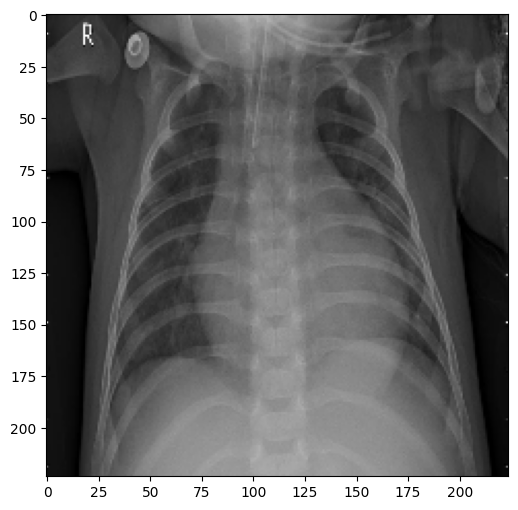

In [ ]:
imshow(X_train[7])

In [ ]:
#building CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# training &validation
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Final_DEPI_project/Saved-model/best-model.weights.h5', monitor='val_loss', mode='min',
    save_weights_only=True, save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
     batch_size=32,
     epochs=20,
    callbacks=[checkpoint]
)

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9844 - loss: 0.0467
Epoch 1: val_loss improved from inf to 0.19973, saving model to /content/drive/MyDrive/Final_DEPI_project/Saved-model/best-model.weights.h5
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9844 - loss: 0.0466 - val_accuracy: 0.9489 - val_loss: 0.1997
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9919 - loss: 0.0231
Epoch 2: val_loss did not improve from 0.19973
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9919 - loss: 0.0232 - val_accuracy: 0.9489 - val_loss: 0.2202
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9927 - loss: 0.0179
Epoch 3: val_loss did not improve from 0.19973
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9926 - loss: 0.0181 - val_accuracy: 0.9253 - val_loss: 0.3132
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9777 - loss: 0.0573
Epoch 4: val_loss improved from 0.19973 to 0.17410, saving model to /content

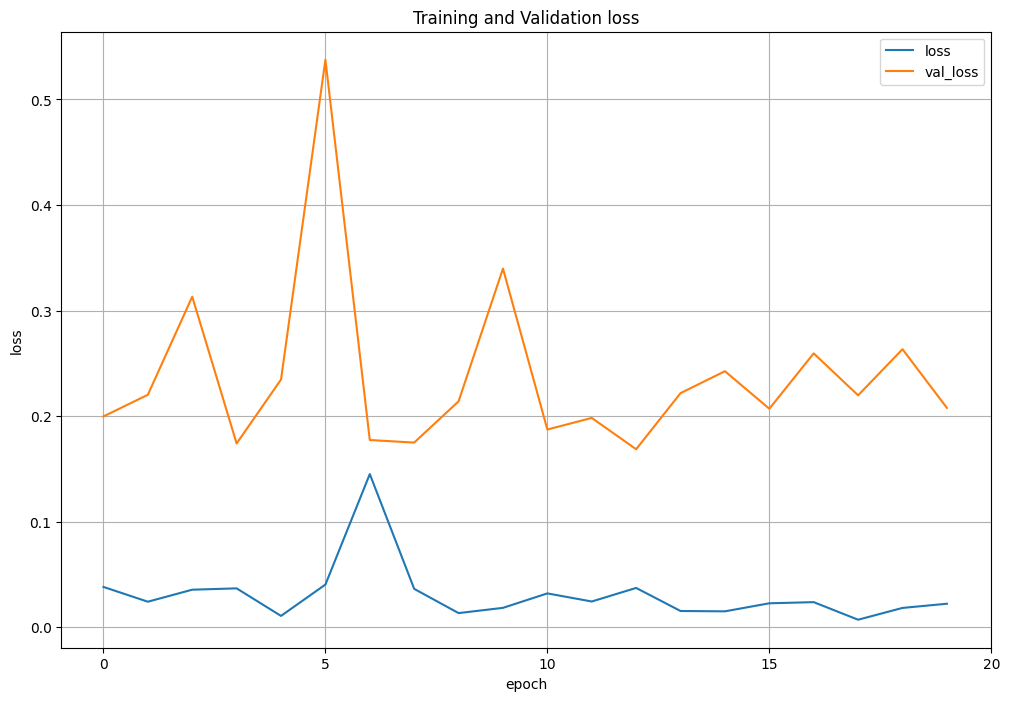

In [ ]:
#visualizing training history
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 21, 5))
plt.show()

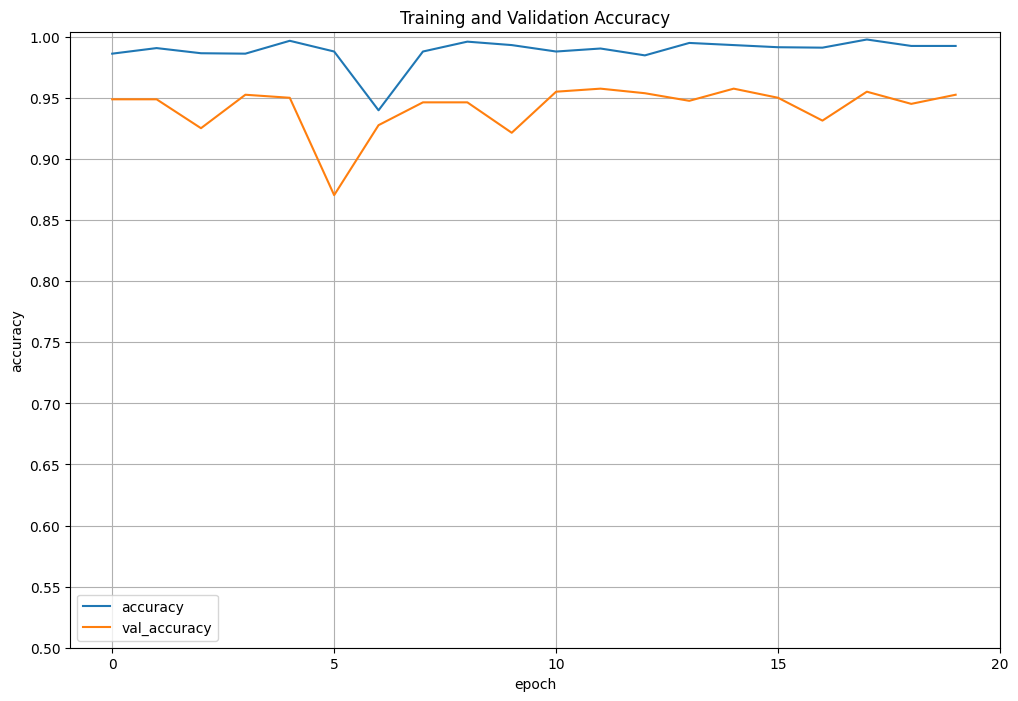

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 21, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
#testing
model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5396 - loss: 3.0910


[1.693386197090149, 0.745192289352417]